In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'Remdoc New.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

In [3]:
# Renommer les colonnes pour enlever les espaces
data.rename(columns=lambda x: x.strip(), inplace=True)

# Convertir les dates en format datetime
data['DVA'] = pd.to_datetime(data['DVA'], format='%d/%m/%Y')
data['DOU'] = pd.to_datetime(data['DOU'], format='%d/%m/%Y')

# Ajouter une colonne pour l'année
data['year'] = data['DVA'].dt.year

In [4]:
# Analyse Statistique de Base
print("Statistiques Descriptives")
display(data.describe())

Statistiques Descriptives


DEV          MDEV         TDEV        MT_LOC  \
count  6376.000000  6.376000e+03  6376.000000  6.376000e+03   
mean     61.609473  4.405869e+05   634.062691  1.462009e+08   
min       0.000000  8.326000e+01     1.000000  4.588941e+04   
25%       1.000000  3.030537e+04   625.416843  1.923022e+07   
50%      86.000000  6.954279e+04   655.957000  4.383433e+07   
75%      86.000000  1.561898e+05   655.957000  9.689010e+07   
max      86.000000  1.156916e+08   688.629397  1.129558e+10   
std      38.446944  3.474241e+06    56.108383  4.405400e+08   

                                 DVA         OPEO  \
count                           6376  6376.000000   
mean   2021-12-11 00:11:44.642408960   704.160759   
min              2020-01-02 00:00:00   224.000000   
25%              2021-01-27 00:00:00   712.000000   
50%              2021-09-30 00:00:00   712.000000   
75%              2022-11-10 00:00:00   712.000000   
max              2024-05-02 00:00:00   899.000000   
std                              NaN   103.626308   

                                 DOU           CLI         year  
count                           6376  6.376000e+03  6376.000000  
mean   2021-11-08 18:40:52.697616128  1.560290e+07  2021.421424  
min              2020-01-02 00:00:00  8.300000e+02  2020.000000  
25%              2020-12-18 00:00:00  8.123715e+06  2021.000000  
50%              2021-08-12 00:00:00  1.525910e+07  2021.000000  
75%              2022-09-27 00:00:00  1.573300e+07  2022.000000  
max              2024-04-30 00:00:00  8.723843e+07  2024.000000  
std                              NaN  1.011399e+07     1.181998

C:\Users\user\AppData\Local\Temp\ipykernel_10196\44566368.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='MT_LOC', data=data, estimator=sum, ci=None, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_10196\44566368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='MT_LOC', data=data, estimator=sum, ci=None, palette='viridis')


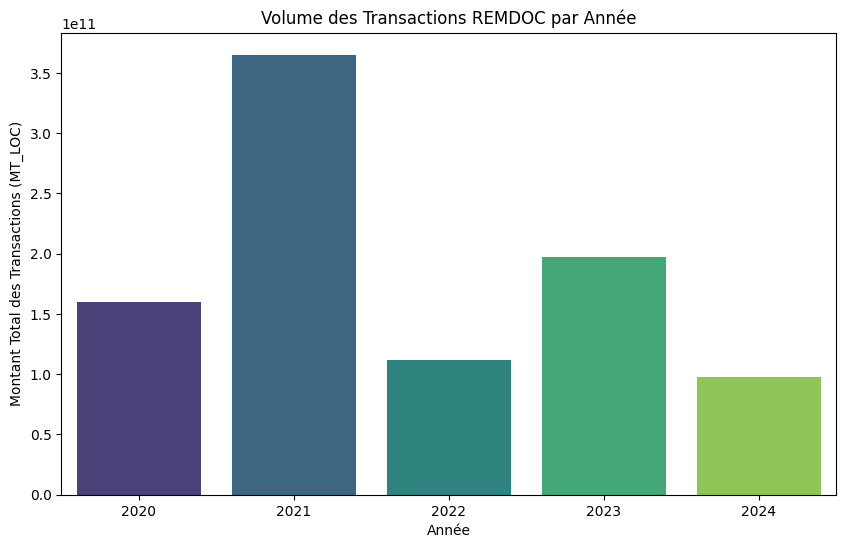

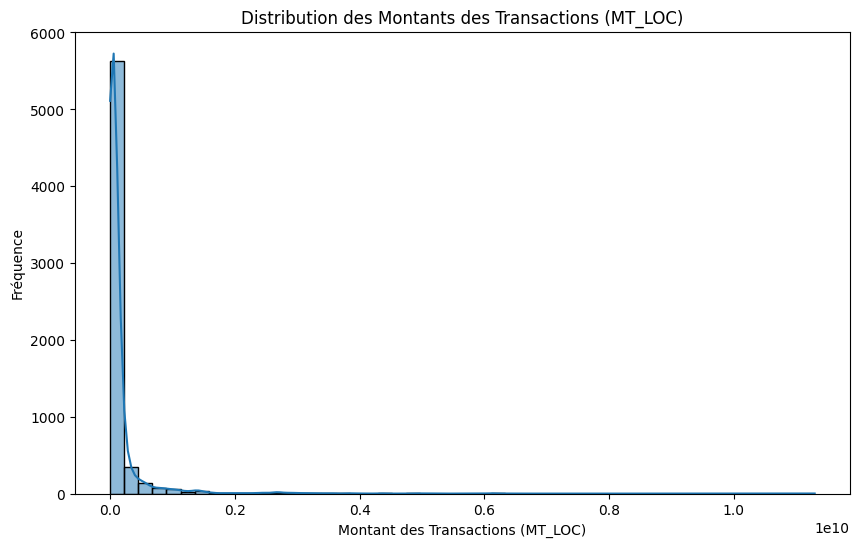

In [5]:
# Visualisation des Montants des Transactions par Année
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='MT_LOC', data=data, estimator=sum, ci=None, palette='viridis')
plt.title('Volume des Transactions REMDOC par Année')
plt.xlabel('Année')
plt.ylabel('Montant Total des Transactions (MT_LOC)')
plt.show()

# Distribution des Montants des Transactions
plt.figure(figsize=(10, 6))
sns.histplot(data['MT_LOC'], bins=50, kde=True)
plt.title('Distribution des Montants des Transactions (MT_LOC)')
plt.xlabel('Montant des Transactions (MT_LOC)')
plt.ylabel('Fréquence')
plt.show()


Top 10 Clients par Montant Total des Transactions
                           Client  Nombre de Transactions  Montant Total  \
36                 COMPT COM MAND                     341   3.621144e+11   
105                     LO AMADOU                     115   8.029837e+10   
122  NOUVELLE MINOTERIE AFRICAINE                      32   6.077057e+10   
154               SI.TRA.COM SARL                     717   5.636571e+10   
143                        SEDIMA                      92   4.815304e+10   
102         LA ROCHETTE DAKAR S.A                     287   3.229966e+10   
151                        SENICO                     329   2.345330e+10   
125                       PATISEN                     268   2.011607e+10   
70                    EXCELLEC SA                     103   1.718053e+10   
115             MOUSSE DU SENEGAL                     464   1.426158e+10   

     Montant Moyen  
36    1.061919e+09  
105   6.982467e+08  
122   1.899080e+09  
154   7.861327e+07  
143   5.

C:\Users\user\AppData\Local\Temp\ipykernel_10196\686486272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Montant Total', y='Client', data=top_clients, palette='viridis')


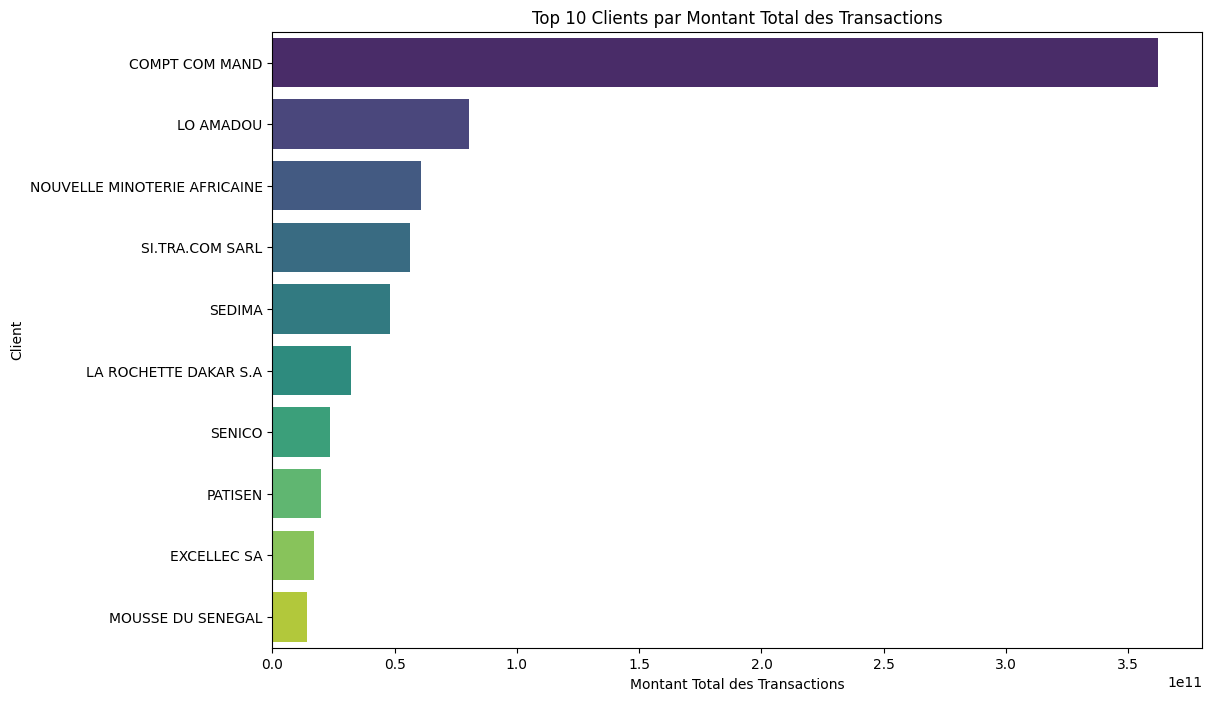

In [6]:
# Analyse des Clients
client_summary = data.groupby('NOM')['MT_LOC'].agg(['count', 'sum', 'mean']).reset_index()
client_summary.columns = ['Client', 'Nombre de Transactions', 'Montant Total', 'Montant Moyen']
top_clients = client_summary.sort_values(by='Montant Total', ascending=False).head(10)

print("Top 10 Clients par Montant Total des Transactions")
print(top_clients)

plt.figure(figsize=(12, 8))
sns.barplot(x='Montant Total', y='Client', data=top_clients, palette='viridis')
plt.title('Top 10 Clients par Montant Total des Transactions')
plt.xlabel('Montant Total des Transactions')
plt.ylabel('Client')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10196\1607967234.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.set_index('DVA').resample('M')['MT_LOC'].sum().reset_index()


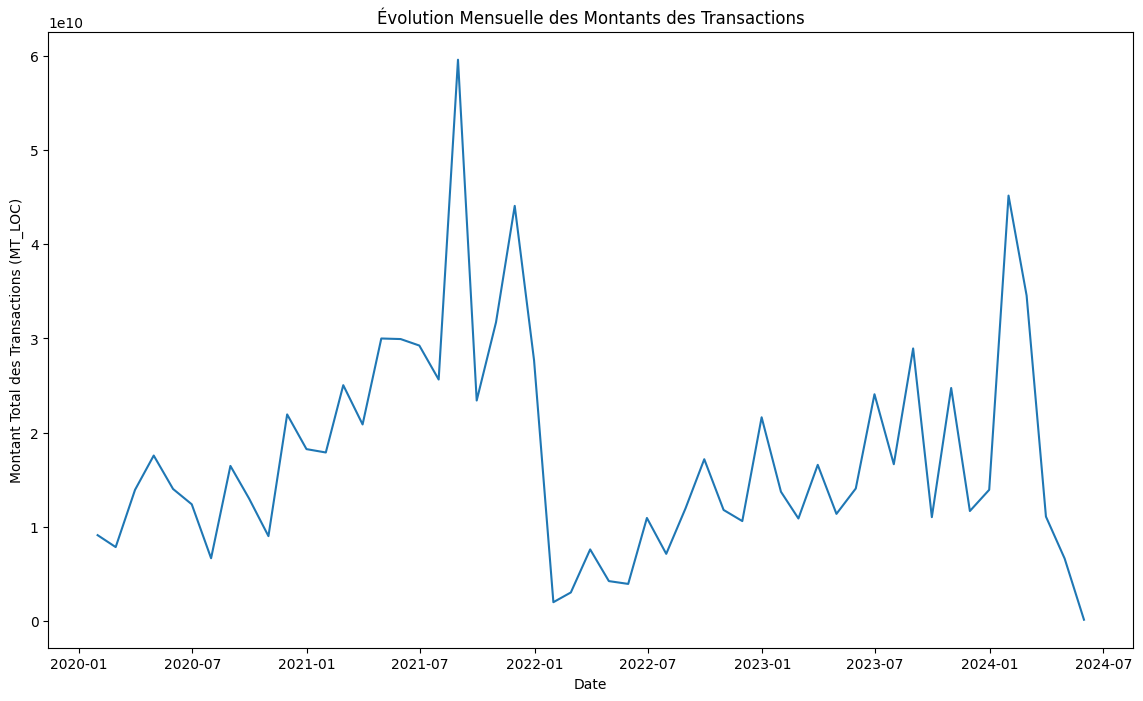

In [7]:
# Analyse Temporelle Détailée
monthly_data = data.set_index('DVA').resample('M')['MT_LOC'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='DVA', y='MT_LOC', data=monthly_data)
plt.title('Évolution Mensuelle des Montants des Transactions')
plt.xlabel('Date')
plt.ylabel('Montant Total des Transactions (MT_LOC)')
plt.show()

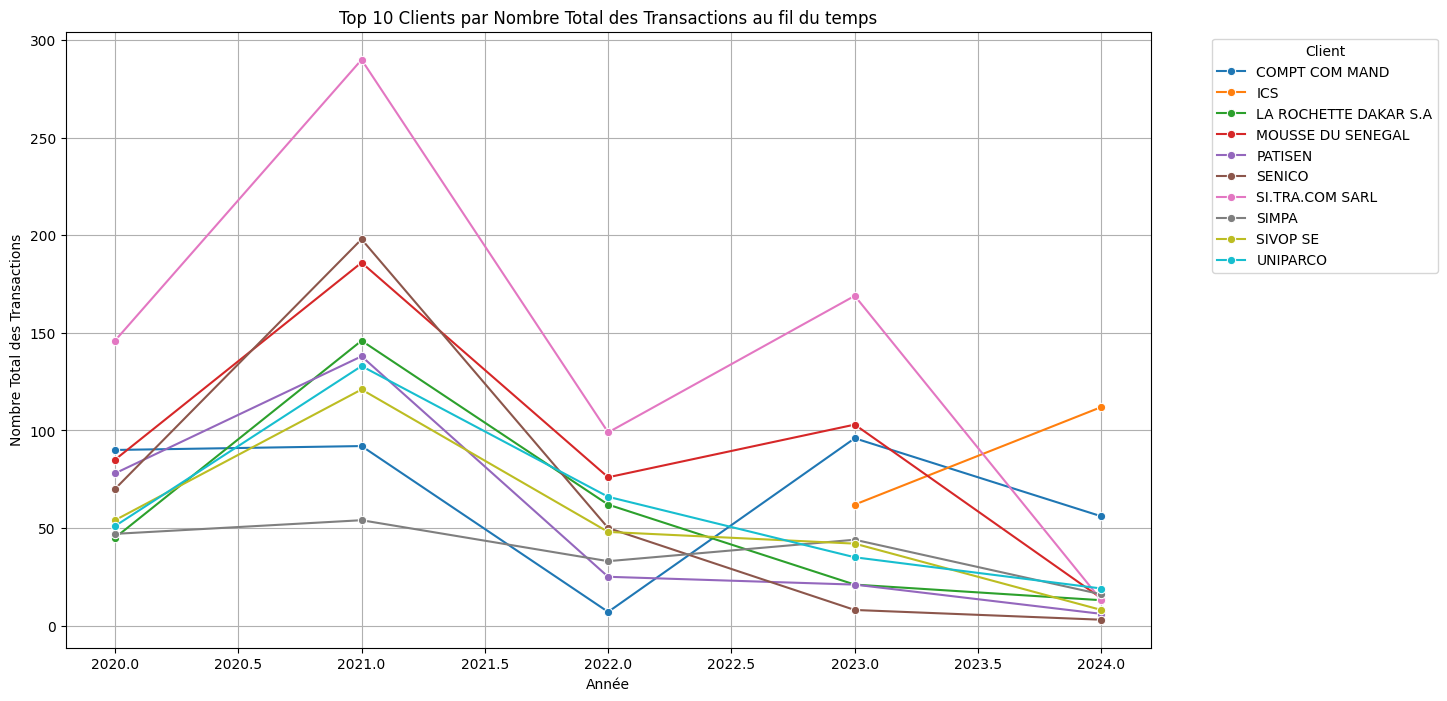

In [9]:
# Identifier les 10 clients avec le plus grand nombre de transactions
top_clients = data['NOM'].value_counts().head(10).index

# Filtrer les données pour inclure uniquement les transactions des top 10 clients
top_clients_data = data[data['NOM'].isin(top_clients)]

# Compter le nombre de transactions par année pour chaque client
transactions_per_client_per_year = top_clients_data.groupby(['NOM', 'year']).size().reset_index(name='Nombre de Transactions')

# Graphique des Top 10 Clients par Nombre Total des Transactions au fil du temps
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='Nombre de Transactions', hue='NOM', data=transactions_per_client_per_year, marker='o')
plt.title('Top 10 Clients par Nombre Total des Transactions au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre Total des Transactions')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10196\1033464793.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOMT', data=top_beneficiaries, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_10196\1033464793.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOMT', data=top_beneficiaries, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_10196\1033464793.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOMT', data=top_beneficiaries, ax=axes[

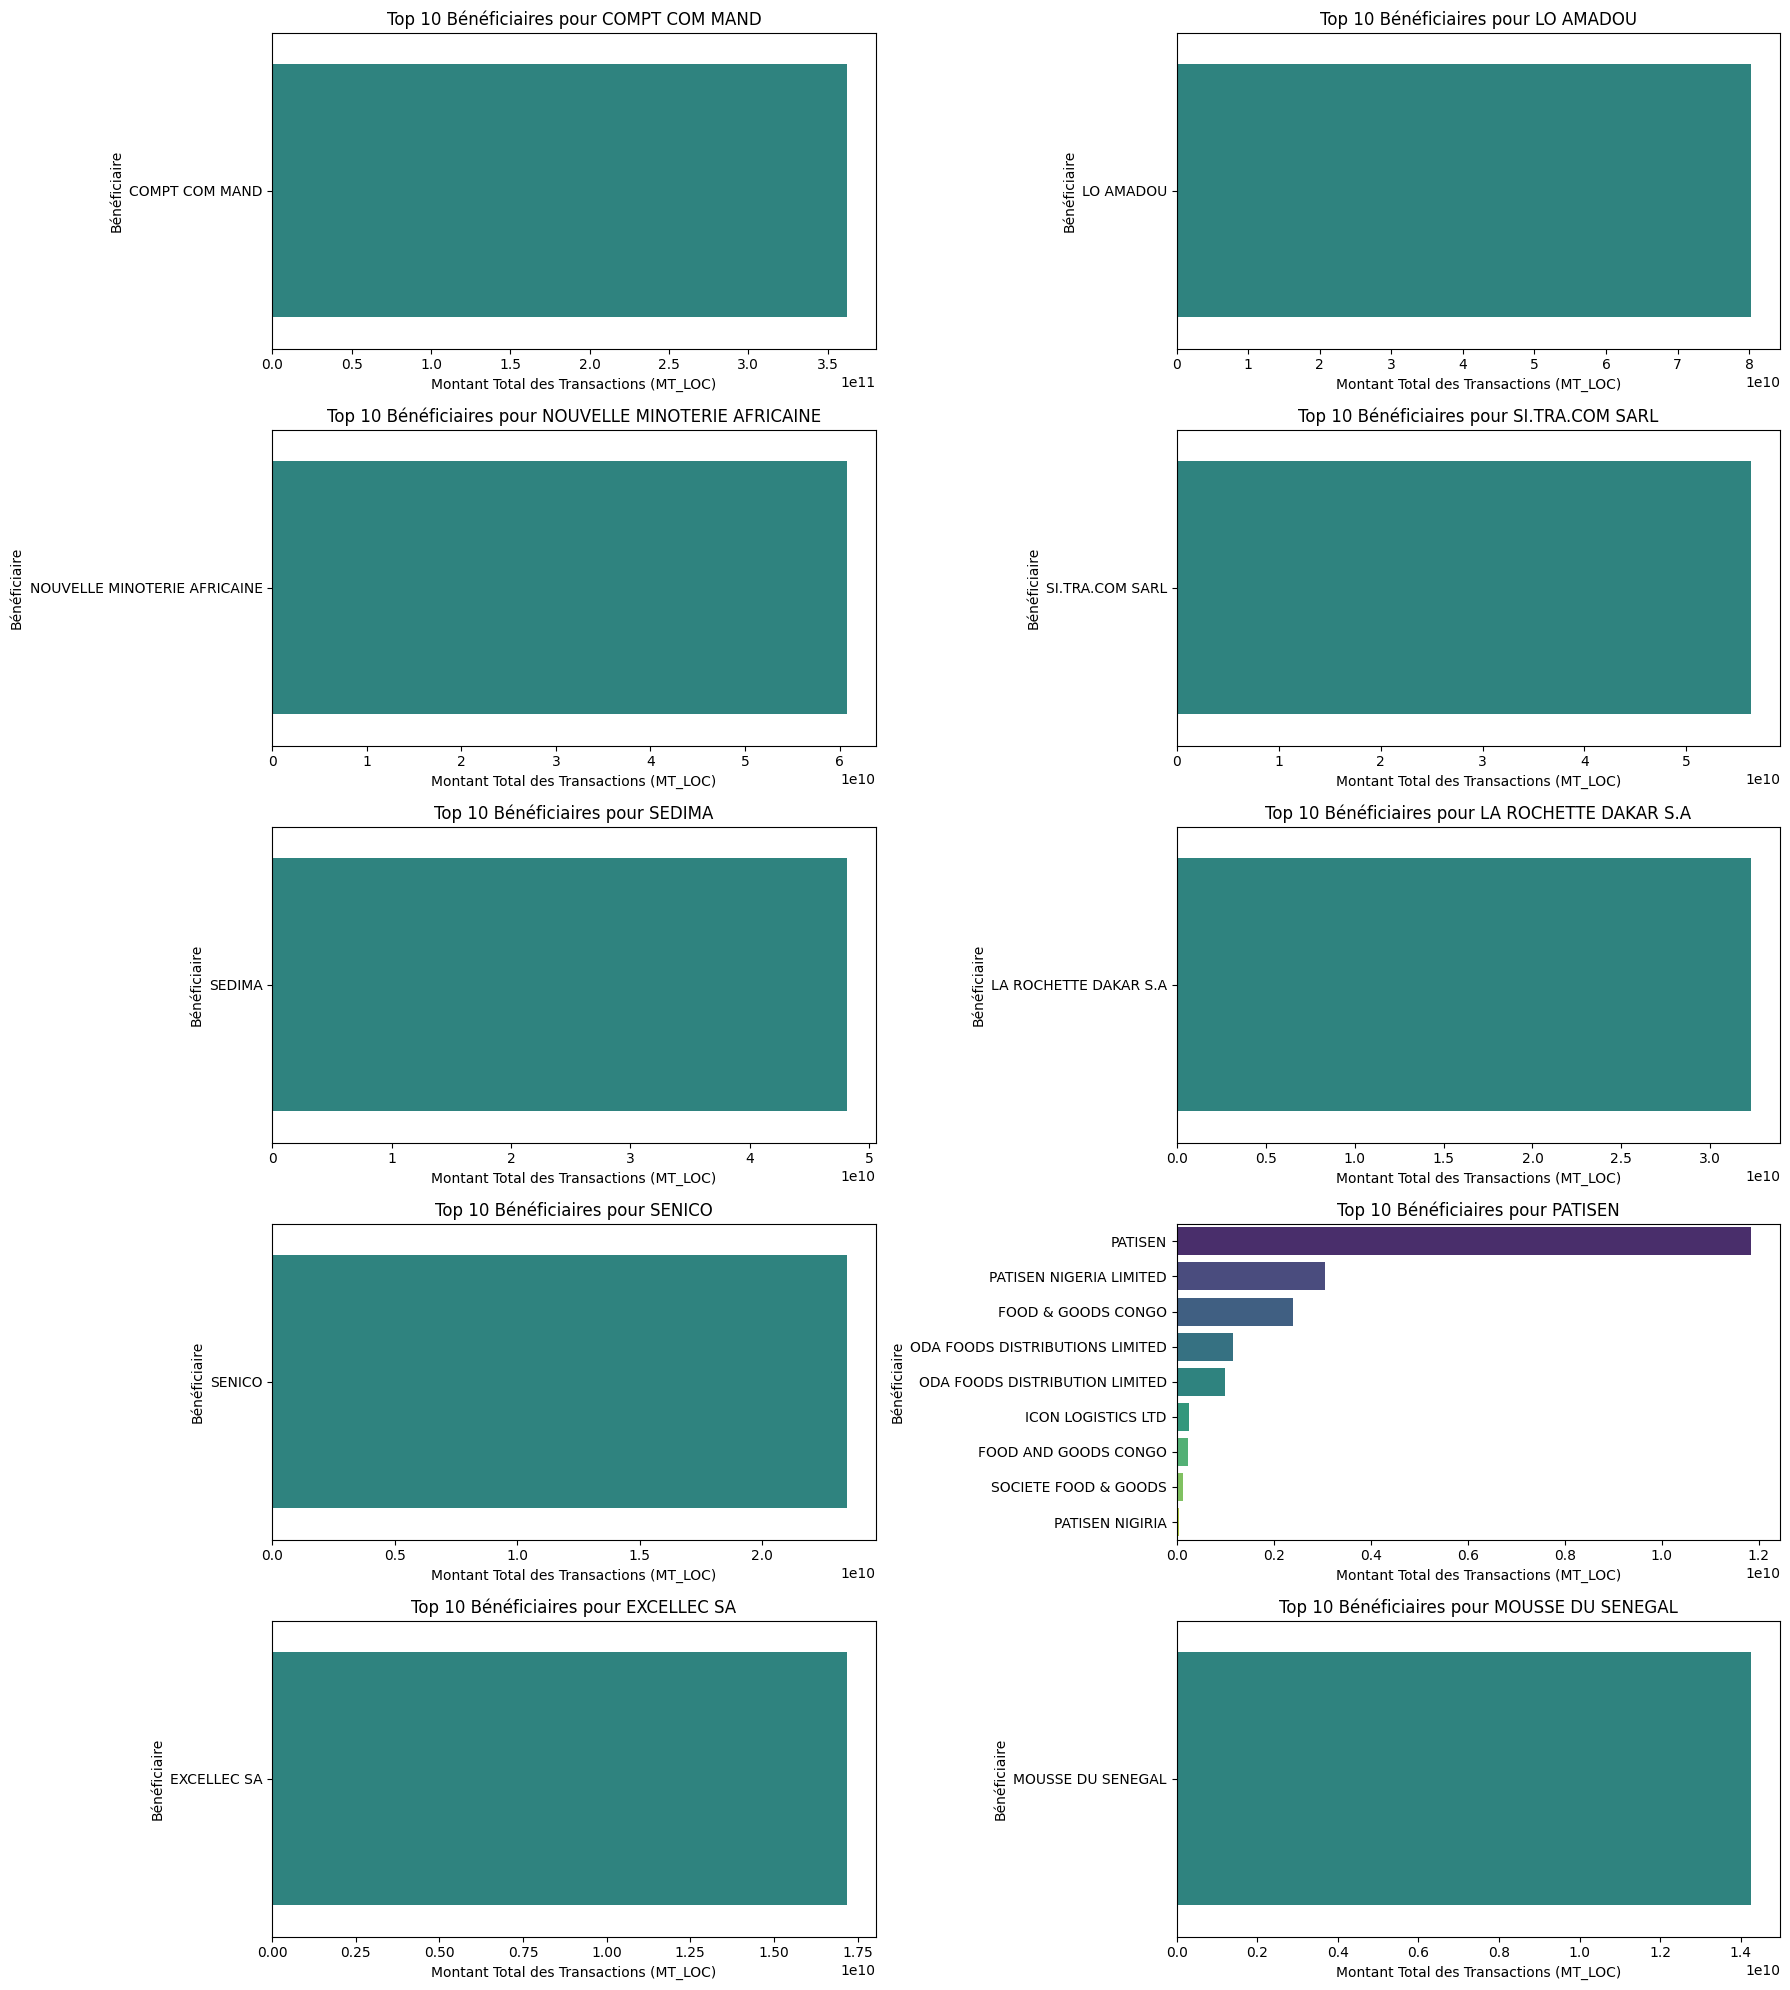

In [11]:
# Identifier les 10 clients avec le montant total des transactions le plus élevé
top_clients_by_amount = data.groupby('NOM')['MT_LOC'].sum().nlargest(10).index

# Filtrer les données pour inclure uniquement les transactions des top 10 clients par montant
top_clients_data = data[data['NOM'].isin(top_clients_by_amount)]

# Initialiser une figure pour les subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

# Pour chaque client, identifier les Top 10 bénéficiaires par montant total des transactions
for i, client in enumerate(top_clients_by_amount):
    # Filtrer les données pour le client actuel
    client_data = top_clients_data[top_clients_data['NOM'] == client]
    
    # Calculer le montant total des transactions par bénéficiaire
    top_beneficiaries = client_data.groupby('NOMT')['MT_LOC'].sum().nlargest(10).reset_index()
    
    # Créer un subplot pour chaque client
    sns.barplot(x='MT_LOC', y='NOMT', data=top_beneficiaries, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 Bénéficiaires pour {client}')
    axes[i].set_xlabel('Montant Total des Transactions (MT_LOC)')
    axes[i].set_ylabel('Bénéficiaire')

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

In [12]:
# Identifier les 10 bénéficiaires avec le montant total des transactions le plus élevé
top_beneficiaries_by_amount = data.groupby('NOMT')['MT_LOC'].sum().nlargest(10).index

# Filtrer les données pour inclure uniquement les transactions des top 10 bénéficiaires par montant
top_beneficiaries_data = data[data['NOMT'].isin(top_beneficiaries_by_amount)]

# Initialiser une figure pour les subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

# Pour chaque bénéficiaire, identifier les Top 10 clients par montant total des transactions
for i, beneficiary in enumerate(top_beneficiaries_by_amount):
    # Filtrer les données pour le bénéficiaire actuel
    beneficiary_data = top_beneficiaries_data[top_beneficiaries_data['NOMT'] == beneficiary]
    
    # Calculer le montant total des transactions par client
    top_clients = beneficiary_data.groupby('NOM')['MT_LOC'].sum().nlargest(10).reset_index()
    
    # Créer un subplot pour chaque bénéficiaire
    sns.barplot(x='MT_LOC', y='NOM', data=top_clients, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 Clients pour {beneficiary}')
    axes[i].set_xlabel('Montant Total des Transactions (MT_LOC)')
    axes[i].set_ylabel('Client')

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10196\2690714602.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOM', data=top_clients, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_10196\2690714602.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOM', data=top_clients, ax=axes[i], palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_10196\2690714602.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MT_LOC', y='NOM', data=top_clients, ax=axes[i], palette='viridis'

In [14]:
# Calculer la moyenne des transactions pour chaque mois de chaque année

# Ajouter des colonnes pour l'année et le mois
data['year'] = data['DVA'].dt.year
data['month'] = data['DVA'].dt.month

monthly_trends = data.groupby(['year', 'month'])['MT_LOC'].mean().reset_index()

# Créer une colonne pour l'année et le mois combinés
monthly_trends['year_month'] = monthly_trends['year'].astype(str) + '-' + monthly_trends['month'].astype(str).str.zfill(2)

# Graphique des tendances mensuelles moyennes des transactions
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_month', y='MT_LOC', data=monthly_trends, marker='o')
plt.title('Tendances Mensuelles Moyennes des Transactions')
plt.xlabel('Année-Mois')
plt.ylabel('Montant Moyen des Transactions (MT_LOC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

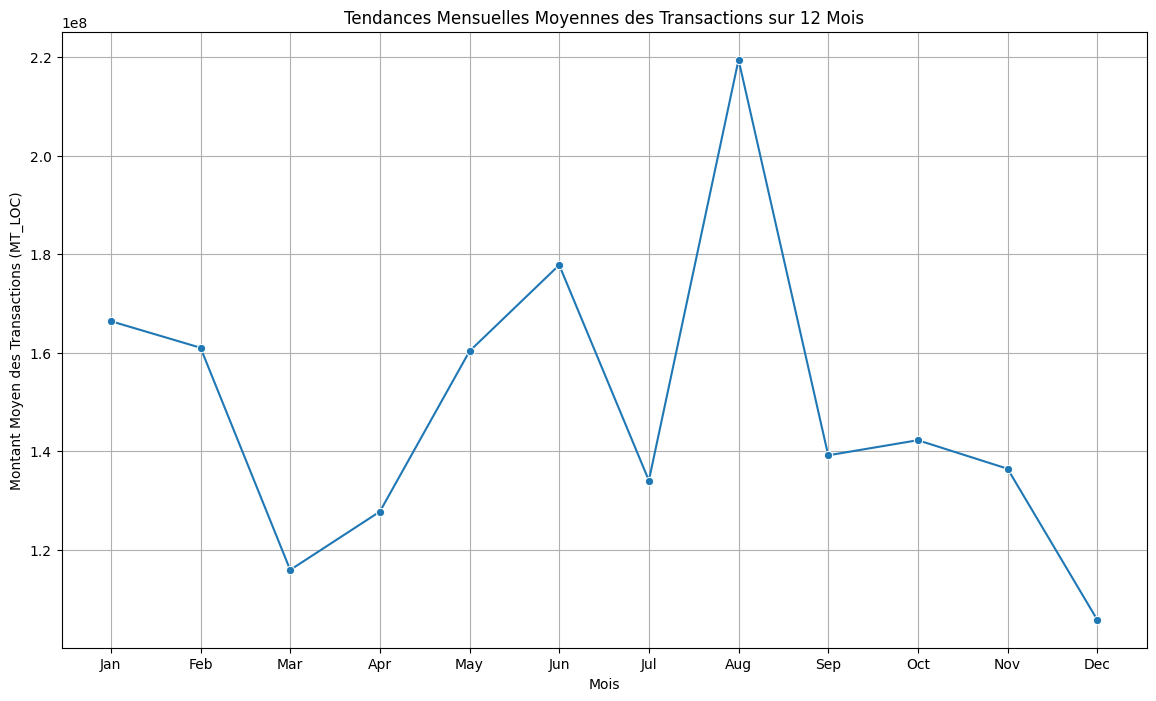

In [15]:
# Calculer la moyenne des transactions pour chaque mois (indépendamment de l'année)
monthly_trends = data.groupby('month')['MT_LOC'].mean().reset_index()

# Graphique des tendances mensuelles moyennes des transactions sur 12 mois
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='MT_LOC', data=monthly_trends, marker='o')
plt.title('Tendances Mensuelles Moyennes des Transactions sur 12 Mois')
plt.xlabel('Mois')
plt.ylabel('Montant Moyen des Transactions (MT_LOC)')
plt.xticks(monthly_trends['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

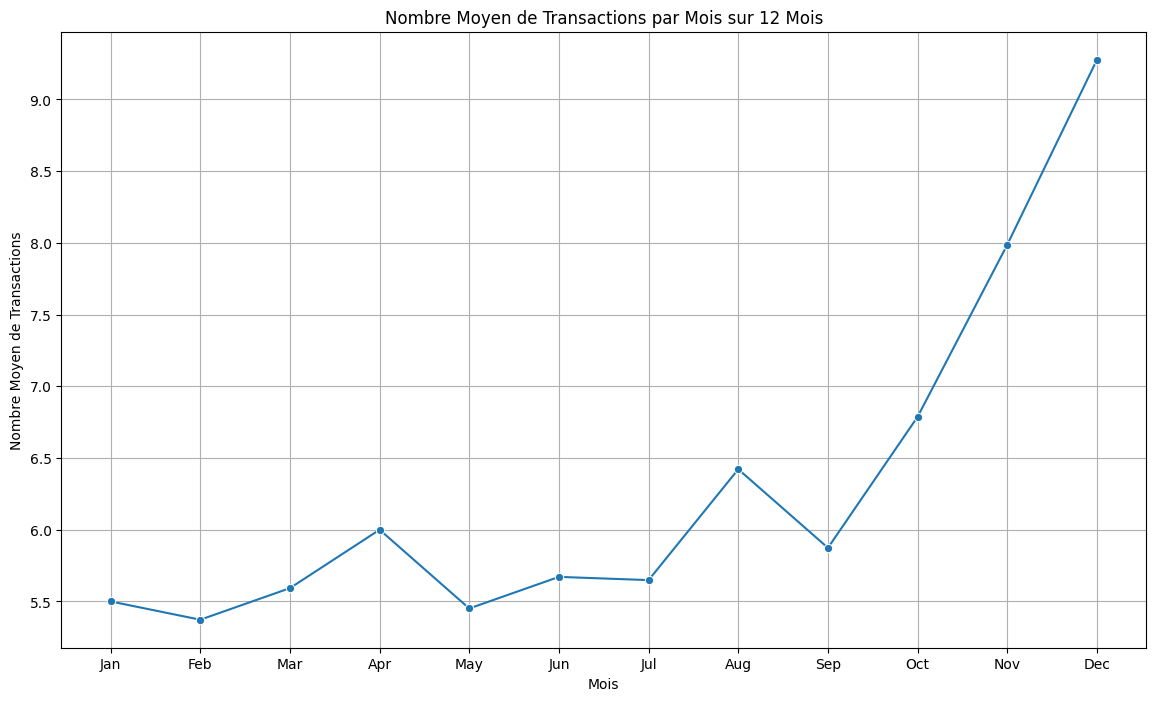

In [16]:
# Compter le nombre de transactions pour chaque mois de chaque année
monthly_transaction_counts = data.groupby(['DVA', 'month']).size().reset_index(name='Nombre de Transactions')

# Calculer le nombre moyen de transactions pour chaque mois (indépendamment de l'année)
average_monthly_transactions = monthly_transaction_counts.groupby('month')['Nombre de Transactions'].mean().reset_index()

# Graphique des tendances mensuelles moyennes du nombre de transactions sur 12 mois
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='Nombre de Transactions', data=average_monthly_transactions, marker='o')
plt.title('Nombre Moyen de Transactions par Mois sur 12 Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre Moyen de Transactions')
plt.xticks(average_monthly_transactions['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

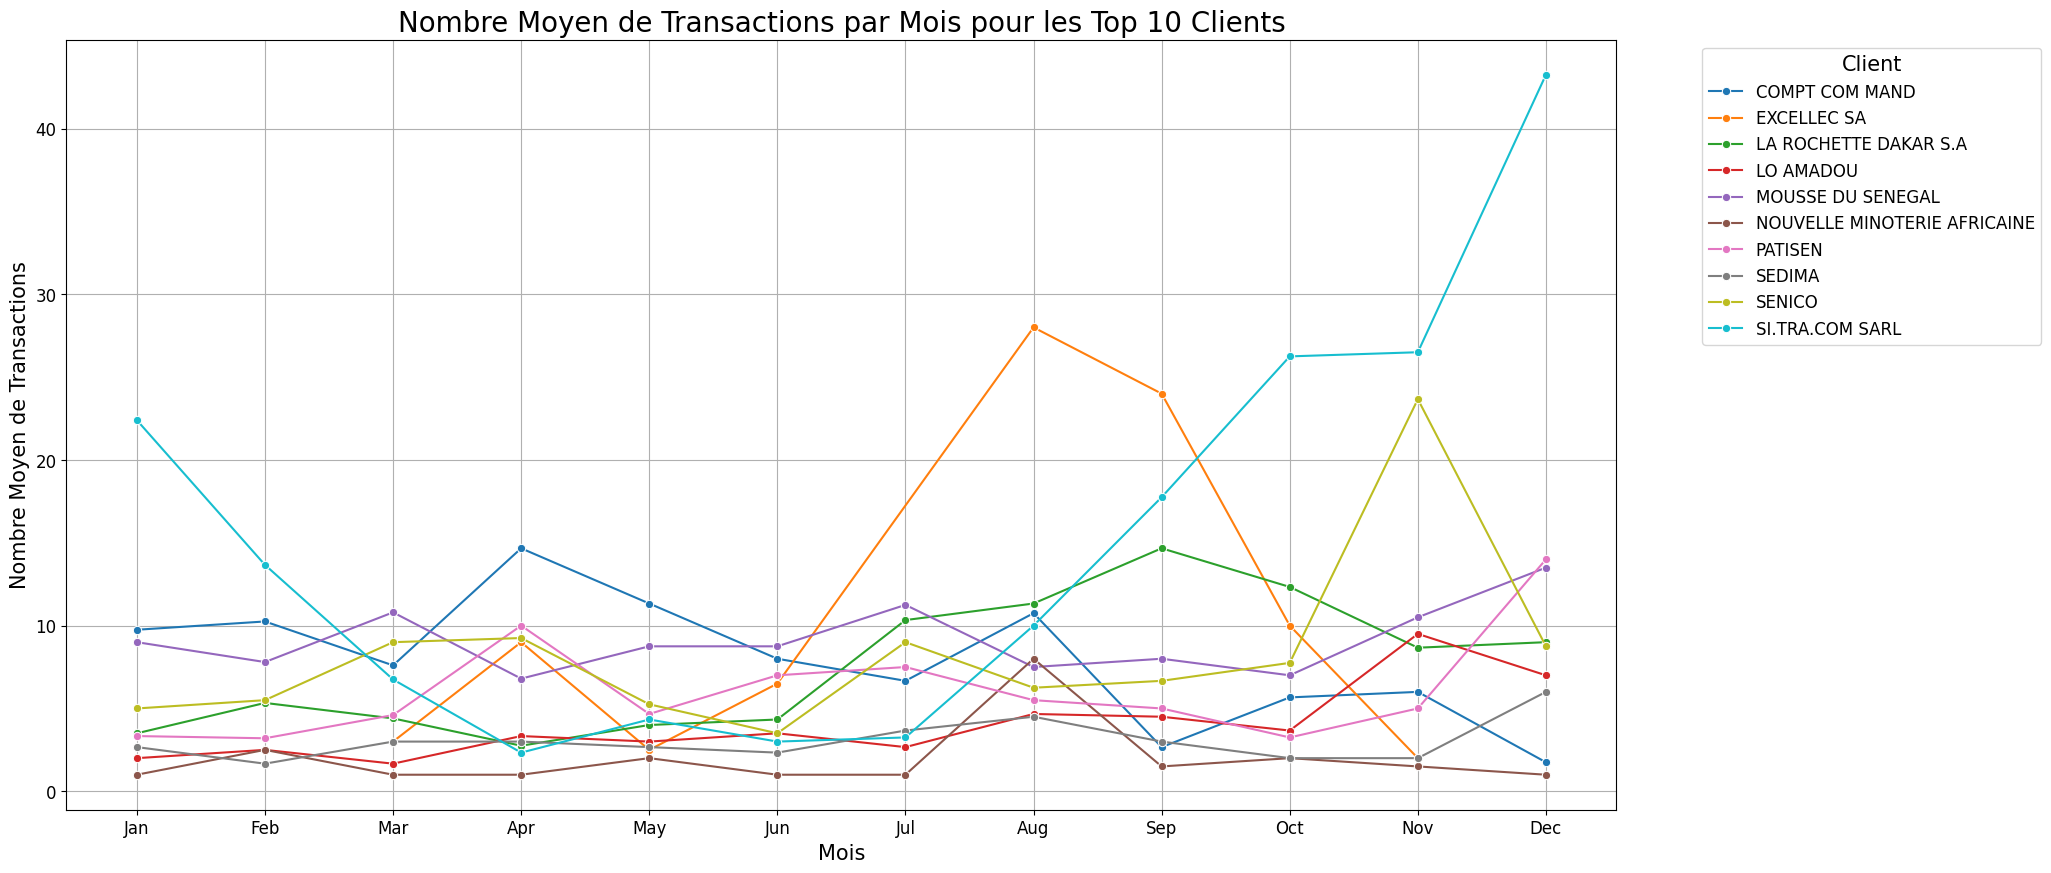

In [20]:
# Calculer le nombre de transactions par mois pour chaque client
monthly_transaction_counts = top_clients_data.groupby(['NOM', 'year', 'month']).size().reset_index(name='Nombre de Transactions')

# Calculer le nombre moyen de transactions par mois pour chaque client
average_monthly_transactions = monthly_transaction_counts.groupby(['NOM', 'month'])['Nombre de Transactions'].mean().reset_index()

# Graphique des tendances mensuelles moyennes du nombre de transactions pour les Top 10 clients
plt.figure(figsize=(20, 10))
sns.lineplot(x='month', y='Nombre de Transactions', hue='NOM', data=average_monthly_transactions, marker='o', palette='tab10')
plt.title('Nombre Moyen de Transactions par Mois pour les Top 10 Clients', fontsize=20)
plt.xlabel('Mois', fontsize=15)
plt.ylabel('Nombre Moyen de Transactions', fontsize=15)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=15)
plt.grid(True)
plt.show()

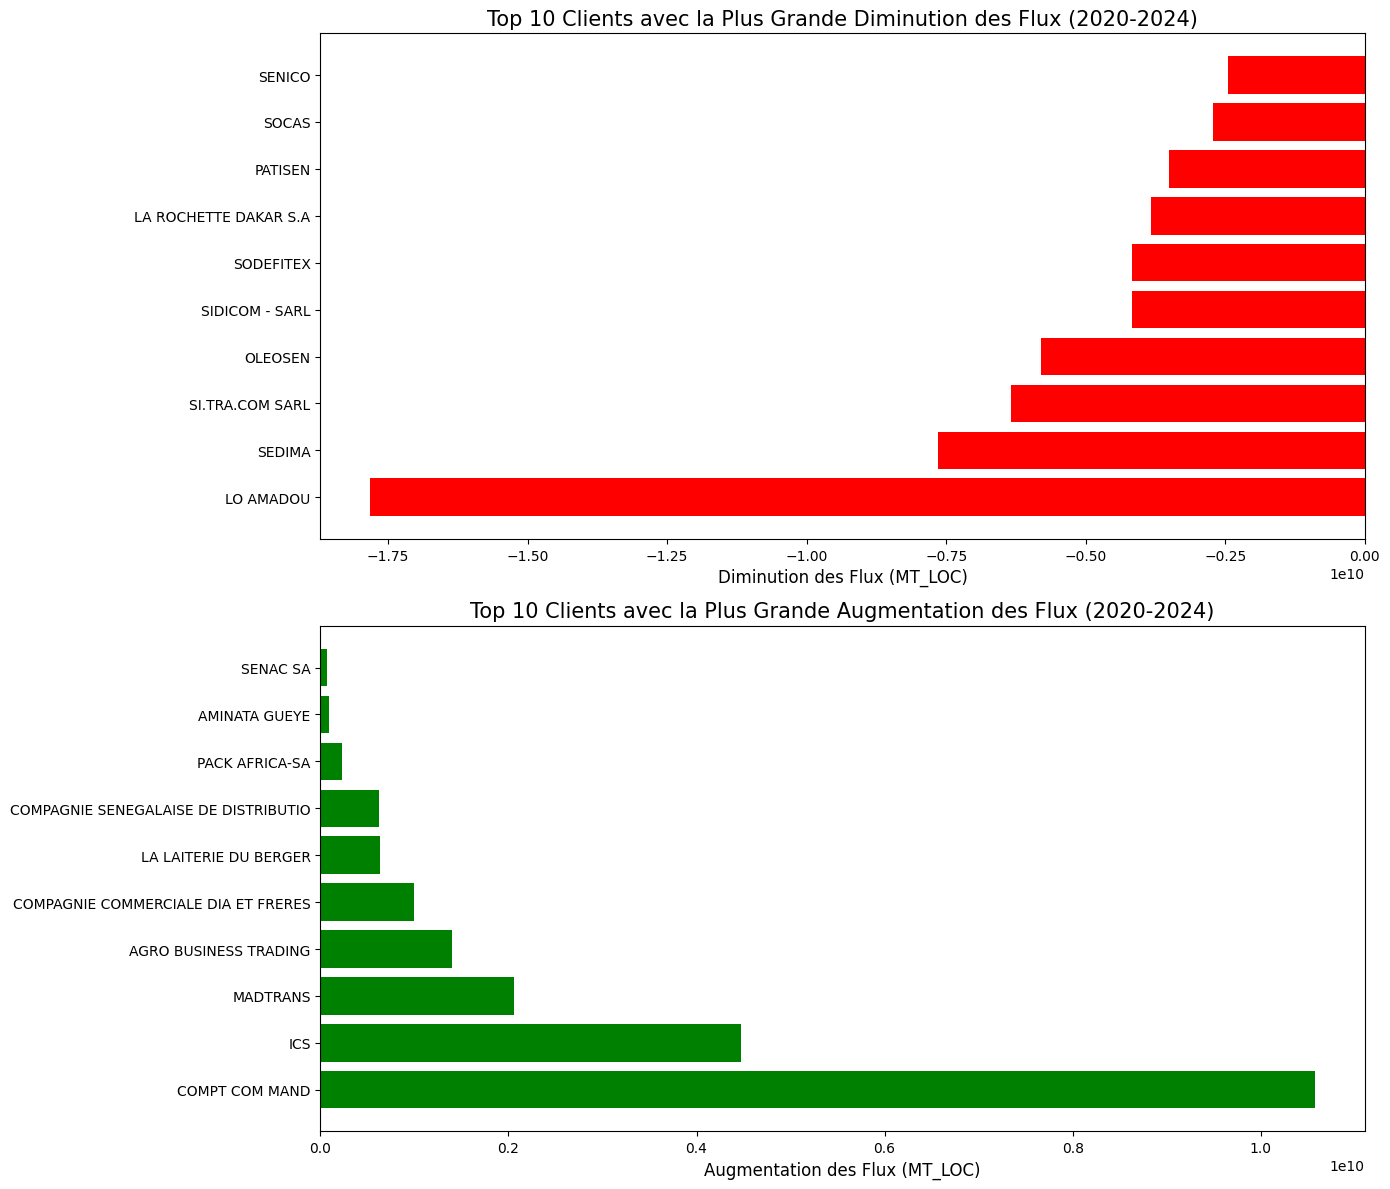

In [21]:
# Filtrer les données pour les années 2020 à 2024
data = data[(data['DVA'].dt.year >= 2020) & (data['DVA'].dt.year <= 2024)]

# Ajouter une colonne pour l'année
data['year'] = data['DVA'].dt.year

# Calculer le montant total des transactions par client et par année
annual_transactions = data.groupby(['NOM', 'year'])['MT_LOC'].sum().unstack(fill_value=0)

# Calculer la différence des montants entre 2020 et 2024
annual_transactions['Difference'] = annual_transactions[2024] - annual_transactions[2020]

# Identifier les Top 10 clients avec la plus grande diminution des flux
top_10_decrease = annual_transactions.nsmallest(10, 'Difference')

# Identifier les Top 10 clients avec la plus grande augmentation des flux
top_10_increase = annual_transactions.nlargest(10, 'Difference')

# Visualisation des résultats
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Graphique pour la diminution des flux
axes[0].barh(top_10_decrease.index, top_10_decrease['Difference'], color='red')
axes[0].set_title('Top 10 Clients avec la Plus Grande Diminution des Flux (2020-2024)', fontsize=15)
axes[0].set_xlabel('Diminution des Flux (MT_LOC)', fontsize=12)

# Graphique pour l'augmentation des flux
axes[1].barh(top_10_increase.index, top_10_increase['Difference'], color='green')
axes[1].set_title('Top 10 Clients avec la Plus Grande Augmentation des Flux (2020-2024)', fontsize=15)
axes[1].set_xlabel('Augmentation des Flux (MT_LOC)', fontsize=12)

plt.tight_layout()
plt.show()

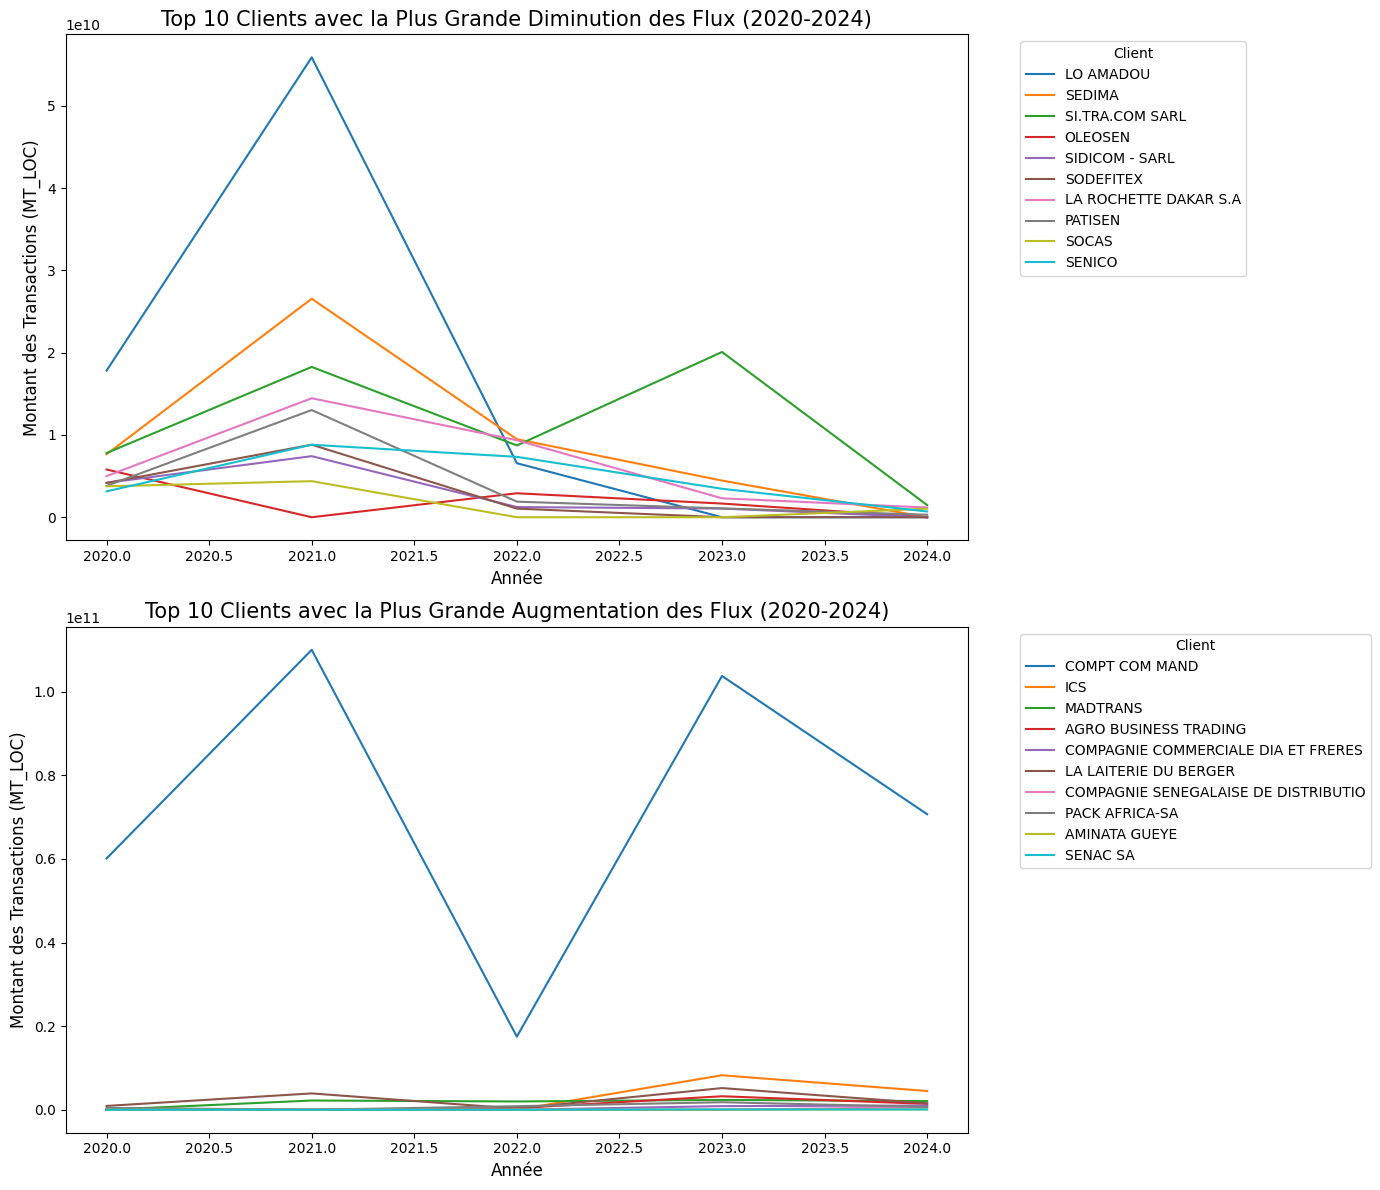

In [22]:
# Réinitialiser les index pour un meilleur affichage
top_10_decrease = top_10_decrease.reset_index()
top_10_increase = top_10_increase.reset_index()

# Visualisation des résultats avec des courbes
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Graphique pour la diminution des flux
for client in top_10_decrease['NOM']:
    sns.lineplot(x=annual_transactions.columns[:-1], y=annual_transactions.loc[client, annual_transactions.columns[:-1]], ax=axes[0], label=client)

axes[0].set_title('Top 10 Clients avec la Plus Grande Diminution des Flux (2020-2024)', fontsize=15)
axes[0].set_xlabel('Année', fontsize=12)
axes[0].set_ylabel('Montant des Transactions (MT_LOC)', fontsize=12)
axes[0].legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graphique pour l'augmentation des flux
for client in top_10_increase['NOM']:
    sns.lineplot(x=annual_transactions.columns[:-1], y=annual_transactions.loc[client, annual_transactions.columns[:-1]], ax=axes[1], label=client)

axes[1].set_title('Top 10 Clients avec la Plus Grande Augmentation des Flux (2020-2024)', fontsize=15)
axes[1].set_xlabel('Année', fontsize=12)
axes[1].set_ylabel('Montant des Transactions (MT_LOC)', fontsize=12)
axes[1].legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [23]:
# Filtrer les données pour les années 2023 et 2024
data_recent = data[data['year'].isin([2023, 2024])]

# Identifier les clients qui n'ont pas de transactions avant 2023
clients_before_2023 = data[data['year'] < 2023]['NOM'].unique()
new_clients = data_recent[~data_recent['NOM'].isin(clients_before_2023)]

# Calculer le montant total des transactions pour ces nouveaux clients
new_clients_total = new_clients.groupby('NOM')['MT_LOC'].sum().nlargest(10).reset_index()

# Filtrer les données pour inclure uniquement les Top 10 nouveaux clients
top_new_clients = new_clients[new_clients['NOM'].isin(new_clients_total['NOM'])]

# Calculer le montant total des transactions par année pour chaque client
annual_transactions_new_clients = top_new_clients.groupby(['NOM', 'year'])['MT_LOC'].sum().unstack(fill_value=0)

# Visualisation des résultats avec des courbes
plt.figure(figsize=(14, 8))

# Graphique pour les nouveaux clients
for client in new_clients_total['NOM']:
    sns.lineplot(x=annual_transactions_new_clients.columns, y=annual_transactions_new_clients.loc[client], marker='o', label=client)

plt.title('Top 10 Nouveaux Clients (2023-2024)', fontsize=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Montant des Transactions (MT_LOC)', fontsize=12)
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()